<a href="https://colab.research.google.com/github/MonicaPatibandla/Machine-Learning/blob/main/ML_Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install the necessary packages
!pip install scikit-learn pandas numpy matplotlib
!pip install prettytable


# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable

# Verify the installations
print("Packages installed and imported successfully.")


Packages installed and imported successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from prettytable import PrettyTable

# Load the heart dataset
file_path = 'heart.csv'
heart_df = pd.read_csv(file_path)

# Select features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# Handle missing values by filling them with the mean of the column
for feature in features:
    heart_df[feature].fillna(heart_df[feature].mean(), inplace=True)

# Define the feature matrix and target vector
X = heart_df[features]
y = heart_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Predict the conditional probabilities
probabilities = gnb.predict_proba(X_test)

# Function to display conditional probabilities for each feature
def display_conditional_probabilities(X, probabilities, feature_names, class_names):
    # Calculate overall probabilities for each class
    overall_probs = probabilities.mean(axis=0)
    overall_probs_table = PrettyTable()
    overall_probs_table.field_names = ["Class", "Probability"]
    for i, class_name in enumerate(class_names):
        overall_probs_table.add_row([class_name, f"{overall_probs[i]:.4f}"])

    # Display overall probabilities
    print("Overall probabilities for each class:\n")
    print(overall_probs_table)
    print("\n")

    # Display conditional probabilities for each feature
    for feature in feature_names:
        feature_table = PrettyTable()
        feature_table.field_names = [feature] + [f"P({class_name})" for class_name in class_names]
        for i, value in enumerate(X[feature]):
            row = [f"{value:.4f}"]
            row.extend([f"{probabilities[i, j]:.4f}" for j in range(len(class_names))])
            feature_table.add_row(row)

        print(f"Conditional probabilities for {feature}:\n")
        print(feature_table)
        print("\n")

# Display conditional probabilities for each feature
display_conditional_probabilities(X_test, probabilities, features, ['No Disease', 'Disease'])

# Calculate and print the accuracy
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy of the Gaussian Naive Bayes classifier: {accuracy:.4f}")

# Function to predict class for user input
def predict_class(user_input):
    # Convert user input to a DataFrame
    input_data = pd.DataFrame([user_input], columns=features)

    # Predict the class
    predicted_class = gnb.predict(input_data)
    predicted_class_name = 'Disease' if predicted_class[0] == 1 else 'No Disease'

    return predicted_class_name

# Get user input
print("Please enter the following feature values for classification:")
user_input = []
for feature in features:
    value = float(input(f"Enter {feature} (e.g., 1 for sex, 120 for trestbps): "))
    user_input.append(value)

# Predict and display the class
predicted_class_name = predict_class(user_input)
print(f"\nThe predicted class based on your input is: {predicted_class_name}")1


Overall probabilities for each class:

+------------+-------------+
|   Class    | Probability |
+------------+-------------+
| No Disease |    0.5186   |
|  Disease   |    0.4814   |
+------------+-------------+


Conditional probabilities for age:

+---------+---------------+------------+
|   age   | P(No Disease) | P(Disease) |
+---------+---------------+------------+
| 57.0000 |     0.9982    |   0.0018   |
| 59.0000 |     0.1731    |   0.8269   |
| 57.0000 |     0.0132    |   0.9868   |
| 56.0000 |     0.9986    |   0.0014   |
| 71.0000 |     0.0072    |   0.9928   |
| 57.0000 |     0.0117    |   0.9883   |
| 46.0000 |     0.4763    |   0.5237   |
| 56.0000 |     1.0000    |   0.0000   |
| 54.0000 |     1.0000    |   0.0000   |
| 54.0000 |     0.2140    |   0.7860   |
| 57.0000 |     0.1691    |   0.8309   |
| 59.0000 |     1.0000    |   0.0000   |
| 52.0000 |     0.0063    |   0.9937   |
| 40.0000 |     0.9993    |   0.0007   |
| 46.0000 |     0.0007    |   0.9993   |
| 44.0000 |

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Load the heart dataset
file_path = 'heart.csv'
heart_df = pd.read_csv(file_path)

# Select features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# Handle missing values by filling them with the mean of the column
for feature in features:
    heart_df[feature].fillna(heart_df[feature].mean(), inplace=True)

# Define the feature matrix and target vector
X = heart_df[features]
y = heart_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Function to add user input to the test set
def add_user_input_to_test_set(user_inputs, X_test, y_test):
    new_inputs = pd.DataFrame(user_inputs, columns=features)
    new_targets = np.zeros(len(user_inputs))  # Placeholder for target values (to be replaced with actual target values if available)
    X_test = pd.concat([X_test, new_inputs], ignore_index=True)
    y_test = np.concatenate([y_test, new_targets])
    return X_test, y_test

# Get user inputs
print("Please enter the following feature values for classification:")
user_inputs = []
num_inputs = int(input("How many random inputs would you like to add? "))
for _ in range(num_inputs):
    user_input = []
    for feature in features:
        value = float(input(f"Enter {feature} (e.g., 1 for sex, 120 for trestbps): "))
        user_input.append(value)
    user_inputs.append(user_input)

# Add user inputs to the test set
X_test, y_test = add_user_input_to_test_set(user_inputs, X_test, y_test)

# Calculate and print the accuracy
accuracy = gnb.score(X_test, y_test)
print(f"Accuracy of the Gaussian Naive Bayes classifier after adding user inputs: {accuracy:.4f}")

Please enter the following feature values for classification:
How many random inputs would you like to add? 1
Enter age (e.g., 1 for sex, 120 for trestbps): 63
Enter sex (e.g., 1 for sex, 120 for trestbps): 1
Enter cp (e.g., 1 for sex, 120 for trestbps): 2
Enter trestbps (e.g., 1 for sex, 120 for trestbps): 130
Enter chol (e.g., 1 for sex, 120 for trestbps): 233
Enter fbs (e.g., 1 for sex, 120 for trestbps): 1
Enter restecg (e.g., 1 for sex, 120 for trestbps): 0
Enter thalach (e.g., 1 for sex, 120 for trestbps): 150
Enter exang (e.g., 1 for sex, 120 for trestbps): 0
Enter oldpeak (e.g., 1 for sex, 120 for trestbps): 2.3
Enter slope (e.g., 1 for sex, 120 for trestbps): 1
Enter ca (e.g., 1 for sex, 120 for trestbps): 0
Enter thal (e.g., 1 for sex, 120 for trestbps): 1
Accuracy of the Gaussian Naive Bayes classifier after adding user inputs: 0.8261


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Load the heart dataset
file_path = 'heart.csv'
heart_df = pd.read_csv(file_path)

# Select features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# Handle missing values by filling them with the mean of the column
for feature in features:
    heart_df[feature].fillna(heart_df[feature].mean(), inplace=True)

# Define the feature matrix and target vector
X = heart_df[features]
y = heart_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
dtc.fit(X_train, y_train)

# Function to add user input to the test set
def add_user_input_to_test_set(user_inputs, X_test, y_test):
    new_inputs = pd.DataFrame(user_inputs, columns=features)
    new_targets = np.zeros(len(user_inputs))  # Placeholder for target values (to be replaced with actual target values if available)
    X_test = pd.concat([X_test, new_inputs], ignore_index=True)
    y_test = np.concatenate([y_test, new_targets])
    return X_test, y_test

# Get user inputs
print("Please enter the following feature values for classification:")
user_inputs = []
num_inputs = int(input("How many random inputs would you like to add? "))
for _ in range(num_inputs):
    user_input = []
    for feature in features:
        value = float(input(f"Enter {feature} (e.g., 1 for sex, 120 for trestbps): "))
        user_input.append(value)
    user_inputs.append(user_input)

# Add user inputs to the test set
X_test, y_test = add_user_input_to_test_set(user_inputs, X_test, y_test)

# Calculate and print the accuracy for Gaussian Naive Bayes
accuracy_gnb = gnb.score(X_test, y_test)
print(f"Accuracy of the Gaussian Naive Bayes classifier after adding user inputs: {accuracy_gnb:.4f}")

# Calculate and print the accuracy for Decision Tree
accuracy_dtc = dtc.score(X_test, y_test)
print(f"Accuracy of the Decision Tree classifier after adding user inputs: {accuracy_dtc:.4f}")


Please enter the following feature values for classification:
How many random inputs would you like to add? 1
Enter age (e.g., 1 for sex, 120 for trestbps): 63
Enter sex (e.g., 1 for sex, 120 for trestbps): 1
Enter cp (e.g., 1 for sex, 120 for trestbps): 2
Enter trestbps (e.g., 1 for sex, 120 for trestbps): 150
Enter chol (e.g., 1 for sex, 120 for trestbps): 133
Enter fbs (e.g., 1 for sex, 120 for trestbps): 1
Enter restecg (e.g., 1 for sex, 120 for trestbps): 0
Enter thalach (e.g., 1 for sex, 120 for trestbps): 150
Enter exang (e.g., 1 for sex, 120 for trestbps): 0
Enter oldpeak (e.g., 1 for sex, 120 for trestbps): 2.3
Enter slope (e.g., 1 for sex, 120 for trestbps): 0
Enter ca (e.g., 1 for sex, 120 for trestbps): 0
Enter thal (e.g., 1 for sex, 120 for trestbps): 1
Accuracy of the Gaussian Naive Bayes classifier after adding user inputs: 0.8261
Accuracy of the Decision Tree classifier after adding user inputs: 0.7283


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable

# Load the heart dataset
file_path = 'heart.csv'
heart_df = pd.read_csv(file_path)

# Select features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# Handle missing values by filling them with the mean of the column
for feature in features:
    heart_df[feature].fillna(heart_df[feature].mean(), inplace=True)

# Define the feature matrix and target vector
X = heart_df[features]
y = heart_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
dtc.fit(X_train, y_train)

# Take the first 10 instances from the dataset
first_10_instances = heart_df.iloc[:10]

# Create a table to display results
result_table = PrettyTable()
result_table.field_names = ["Instance", "Naive Bayes Accuracy", "Decision Tree Accuracy"]

# Function to calculate accuracy for a single instance
def calculate_instance_accuracy(instance, model, X_test, y_test):
    # Append the instance to the test set
    X_test_instance = pd.concat([X_test, instance[features].to_frame().T], ignore_index=True) # Use pd.concat to append the instance as a DataFrame
    y_test_instance = np.append(y_test, instance[target])
    # Calculate accuracy
    return model.score(X_test_instance, y_test_instance)

# Iterate over the first 10 instances
for i in range(len(first_10_instances)):
    instance = first_10_instances.iloc[i]
    nb_accuracy = calculate_instance_accuracy(instance, gnb, X_test, y_test)
    dt_accuracy = calculate_instance_accuracy(instance, dtc, X_test, y_test)
    result_table.add_row([i+1, f"{nb_accuracy:.4f}", f"{dt_accuracy:.4f}"])

# Print the result table
print(result_table)

+----------+----------------------+------------------------+
| Instance | Naive Bayes Accuracy | Decision Tree Accuracy |
+----------+----------------------+------------------------+
|    1     |        0.8370        |         0.7391         |
|    2     |        0.8261        |         0.7391         |
|    3     |        0.8370        |         0.7391         |
|    4     |        0.8370        |         0.7391         |
|    5     |        0.8370        |         0.7391         |
|    6     |        0.8370        |         0.7391         |
|    7     |        0.8370        |         0.7391         |
|    8     |        0.8370        |         0.7283         |
|    9     |        0.8370        |         0.7391         |
|    10    |        0.8370        |         0.7391         |
+----------+----------------------+------------------------+


+----------+----------------------+------------------------+
| Instance | Naive Bayes Accuracy | Decision Tree Accuracy |
+----------+----------------------+------------------------+
|    1     |        0.8370        |         0.7391         |
|    2     |        0.8261        |         0.7391         |
|    3     |        0.8370        |         0.7391         |
|    4     |        0.8370        |         0.7391         |
|    5     |        0.8370        |         0.7391         |
|    6     |        0.8370        |         0.7391         |
|    7     |        0.8370        |         0.7391         |
|    8     |        0.8370        |         0.7283         |
|    9     |        0.8370        |         0.7391         |
|    10    |        0.8370        |         0.7391         |
+----------+----------------------+------------------------+


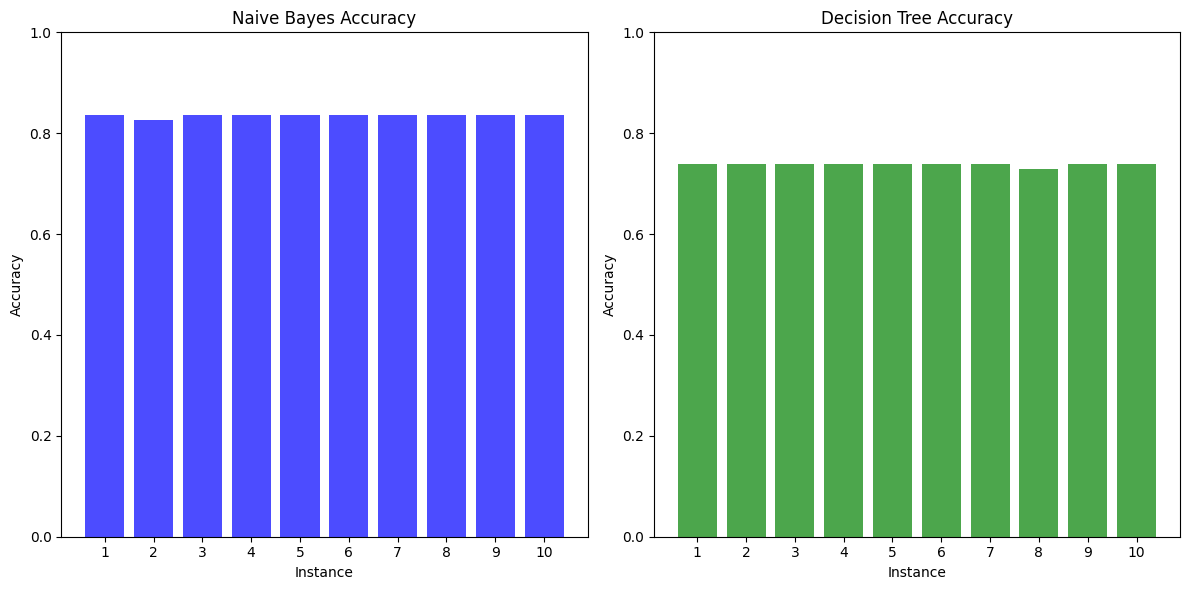

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from prettytable import PrettyTable
import matplotlib.pyplot as plt

# Load the heart dataset
file_path = 'heart.csv'
heart_df = pd.read_csv(file_path)

# Select features and target
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = 'target'

# Handle missing values by filling them with the mean of the column
for feature in features:
    heart_df[feature].fillna(heart_df[feature].mean(), inplace=True)

# Define the feature matrix and target vector
X = heart_df[features]
y = heart_df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Initialize the Decision Tree classifier
dtc = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model on the training data
dtc.fit(X_train, y_train)

# Take the first 10 instances from the dataset
first_10_instances = heart_df.iloc[:10]

# Create a table to display results
result_table = PrettyTable()
result_table.field_names = ["Instance", "Naive Bayes Accuracy", "Decision Tree Accuracy"]

# Initialize lists to store accuracies for plotting
nb_accuracies = []
dt_accuracies = []

# Function to calculate accuracy for a single instance
def calculate_instance_accuracy(instance, model, X_test, y_test):
    # Append the instance to the test set
    X_test_instance = pd.concat([X_test, instance[features].to_frame().T], ignore_index=True)
    y_test_instance = np.append(y_test, instance[target])
    # Calculate accuracy
    return model.score(X_test_instance, y_test_instance)

# Iterate over the first 10 instances
for i in range(len(first_10_instances)):
    instance = first_10_instances.iloc[i]
    nb_accuracy = calculate_instance_accuracy(instance, gnb, X_test, y_test)
    dt_accuracy = calculate_instance_accuracy(instance, dtc, X_test, y_test)
    result_table.add_row([i+1, f"{nb_accuracy:.4f}", f"{dt_accuracy:.4f}"])
    nb_accuracies.append(nb_accuracy)
    dt_accuracies.append(dt_accuracy)

# Print the result table
print(result_table)

# Visualize the accuracies
instances = range(1, len(first_10_instances) + 1)

plt.figure(figsize=(12, 6))

# Plot Naive Bayes accuracies
plt.subplot(1, 2, 1)
plt.bar(instances, nb_accuracies, color='blue', alpha=0.7)
plt.title('Naive Bayes Accuracy')
plt.xlabel('Instance')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(instances)

# Plot Decision Tree accuracies
plt.subplot(1, 2, 2)
plt.bar(instances, dt_accuracies, color='green', alpha=0.7)
plt.title('Decision Tree Accuracy')
plt.xlabel('Instance')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(instances)

plt.tight_layout()
plt.show()
